In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mall_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
encodedGender = []
for i in range(len(df)):
    if df.iloc[i]["Gender"] == "Male":
        encodedGender.append(1)
    else:
        encodedGender.append(0)

df["Encoded Gender"] = encodedGender
df.drop(["Gender"], axis=1, inplace = True)

In [5]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Encoded Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


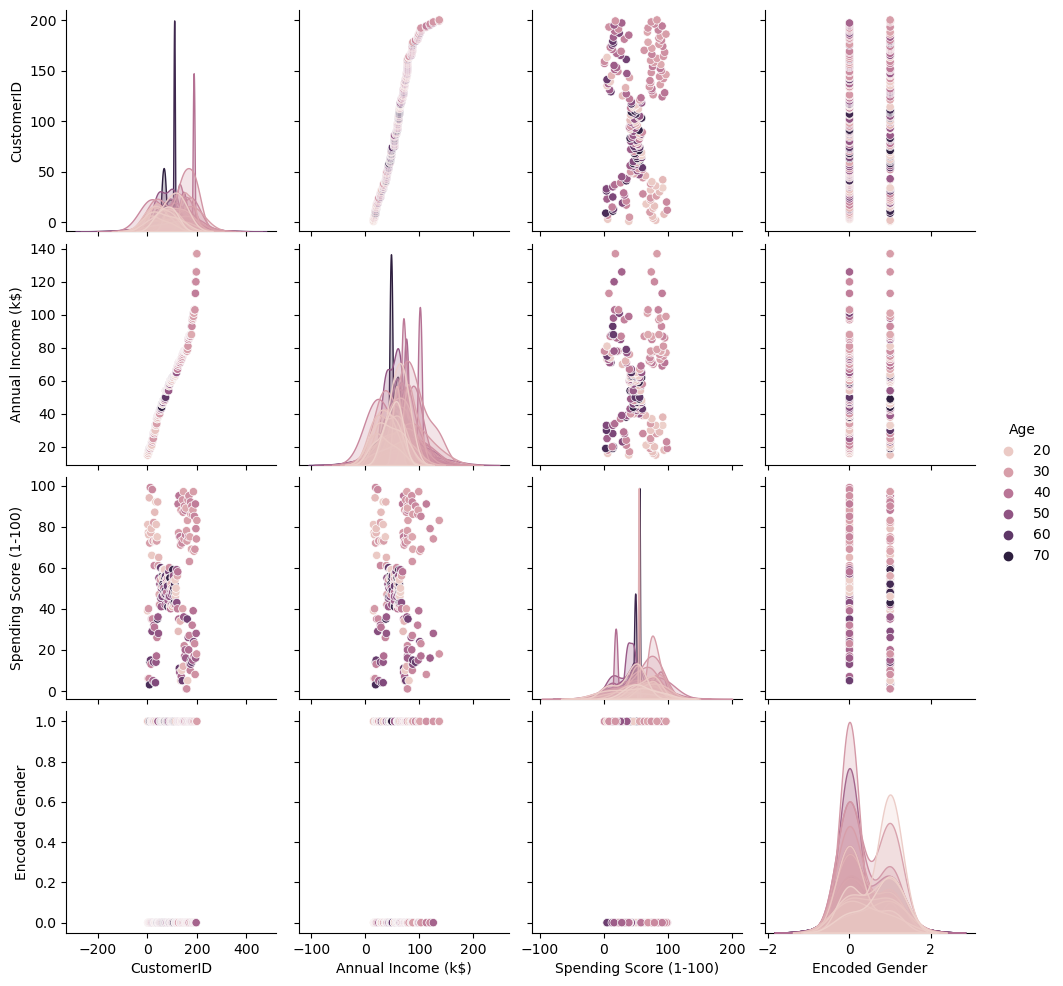

In [6]:
import matplotlib.pyplot as plt
sns.pairplot(data=df, hue="Age")
plt.show()

In [7]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)

In [8]:
gm.fit(df)

GaussianMixture(n_components=2)

In [9]:
# Evaluation with Bayesian Information Criteria (BIC)
gm.bic(df)

7074.348450127749

In [10]:
bics = []
for k in range(2, 20):
    gm = GaussianMixture(n_components=k)
    gm.fit(df)
    bics.append(gm.bic(df))

In [17]:
frame = pd.DataFrame({'Clusters': range(2, 20), "BIC": bics})
frame.head()

,Clusters,BIC
0,2,7074.348450
1,3,6900.394676
2,4,6952.556817
3,5,6912.700316
4,6,6953.645712


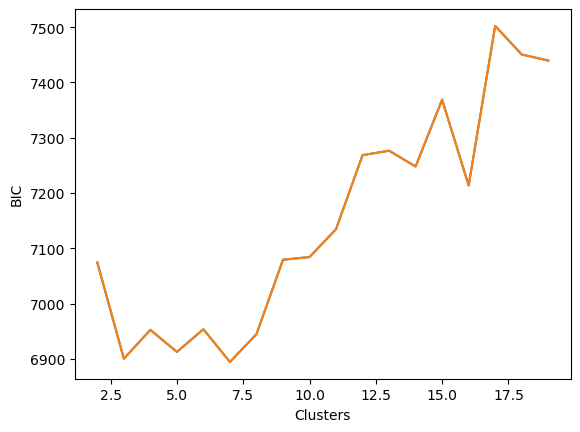

In [19]:
sns.lineplot(data=frame, x="Clusters", y="BIC")
plt.show()

In [20]:
gm = GaussianMixture(n_components=6)
gm.fit(df)
predictions = gm.predict(df)

In [21]:
predictions

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 2,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Encoded Gender          200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [22]:
gm.means_
# Cluster 1 - female gen Zers with low incomes who are big spenders
# Cluster 2 - female millenials with high incomes who are big spenders
# Cluster 3 - female millenials with medium incomes who are middle spenders

array([[ 23.13151171,  25.28698602,  25.7540898 ,  79.34146304,
          0.40869193],
       [178.08144622,  31.51740259,  95.44231901,  81.70716845,
          0.38444469],
       [128.38822003,  39.12491084,  70.07243573,  55.27906078,
          0.46817224],
       [ 23.01656507,  44.89922795,  26.28579125,  21.07713871,
          0.38937846],
       [ 75.23787449,  43.4424885 ,  51.50003988,  50.15707357,
          0.41270388],
       [171.49976709,  40.28512929,  92.0442821 ,  17.23517904,
          0.56488289]])